# Tabular data

In [0]:
from fastai.tabular import *

In [2]:
import os 
path = os.getcwd()
path

'/content'

In [3]:
AS = untar_data(URLs.ADULT_SAMPLE, dest=path)

In [4]:
import pandas as pd
df = pd.read_csv(AS/'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [0]:
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [FillMissing, Categorify, Normalize]

In [0]:
test = TabularList.from_df(df.iloc[800:1000].copy(), cat_names=cat_names, cont_names=cont_names)

In [0]:
data = (TabularList.from_df(df, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [14]:
data.show_batch(rows=10)

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,False,0.1769,0.1281,-0.4224,>=50k
Private,Some-college,Never-married,Adm-clerical,Unmarried,Black,False,-0.9959,0.2142,-0.0312,<50k
Private,Assoc-acdm,Married-civ-spouse,Machine-op-inspct,Husband,White,False,-0.9226,-0.8776,0.7511,>=50k
Local-gov,HS-grad,Married-civ-spouse,Protective-serv,Husband,White,False,-0.4828,-0.7307,-0.4224,<50k
Private,Some-college,Never-married,Other-service,Own-child,White,False,-1.4357,-0.1794,-0.0312,<50k
Private,Bachelors,Divorced,Transport-moving,Own-child,Black,False,0.1769,0.1038,1.1422,<50k
Private,Bachelors,Never-married,Prof-specialty,Not-in-family,Black,False,0.9098,-0.0714,1.1422,<50k
Private,Bachelors,Married-civ-spouse,Craft-repair,Husband,White,False,-0.1163,0.0305,1.1422,>=50k
Private,Doctorate,Divorced,Sales,Unmarried,White,False,0.1769,-1.1789,2.3157,>=50k
Local-gov,12th,Never-married,Handlers-cleaners,Unmarried,Black,False,-1.2891,0.2186,-0.8135,<50k


# learner design syntax
---

In [0]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)


In [16]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(17, 8)
    (2): Embedding(8, 5)
    (3): Embedding(16, 8)
    (4): Embedding(7, 5)
    (5): Embedding(6, 4)
    (6): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=42, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=200, out_features=100, bias=True)
    (4): ReLU(inplace=True)
    (5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [17]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


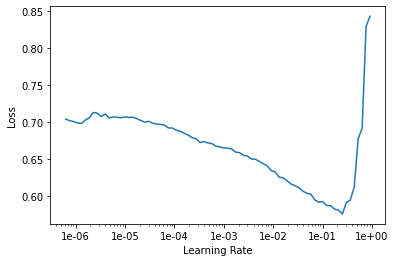

In [18]:
learn.recorder.plot()

In [24]:
learn.fit(20, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.351366,0.394436,0.810000,00:06
1,0.360041,0.385162,0.835000,00:06
2,0.349227,0.376584,0.830000,00:06
3,0.357714,0.361818,0.825000,00:06
4,0.358358,0.351158,0.840000,00:06
5,0.343526,0.355762,0.850000,00:06
6,0.340444,0.354454,0.845000,00:06
7,0.355772,0.347363,0.860000,00:06
8,0.354204,0.345019,0.840000,00:06
9,0.353695,0.344979,0.845000,00:06


In [0]:
row = df.iloc[1]

In [23]:
learn.predict(row)

(Category tensor(0), tensor(0), tensor([0.6770, 0.3230]))

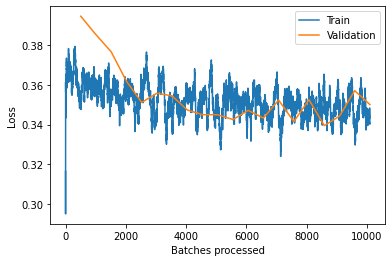

In [25]:
learn.recorder.plot_losses()

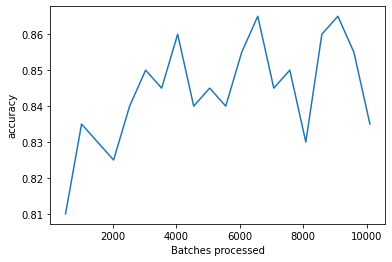

In [26]:
learn.recorder.plot_metrics()